## MSDS 422 - Module 2 Assignment 1: House Prices (Kaggle)
# Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%202
## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_2 = pd.read_csv('test.csv')
# show head of training data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# show head of test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Need to predict SalePrice

In [4]:
# check info of training data
df_train.info()
# check Summary statistics of training data
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Street Dichotomous Prediction

In [5]:
df_train_street = pd.read_csv('train.csv')
df_train_street['Street'] = df_train_street['Street'].map({'Pave':1 ,'Grvl':0})

Text(0.5, 0, 'SalePrice')

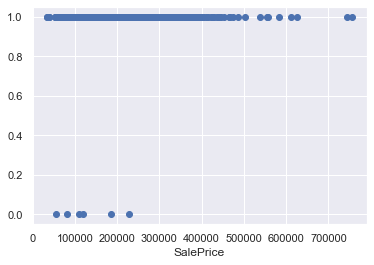

In [6]:
stree_x = df_train_street.loc[:,'SalePrice']
stree_y = df_train_street.loc[:,'Street']
plt.scatter(stree_x, stree_y, color="b")
plt.xlabel("SalePrice")

In [7]:
stree_x_train, stree_x_test, stree_y_train, stree_y_test = train_test_split(stree_x,stree_y,test_size = 0.3)
stree_x_train=stree_x_train.values.reshape(-1,1)
stree_x_test=stree_x_test.values.reshape(-1,1)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(stree_x_train, stree_y_train)
model.score(stree_x_test,stree_y_test)

0.9954337899543378

The accuracy rate is close to 1, indicating that all data predictions of the test (from 30% data from train) set are accurate.

## GrLivArea - SalePrice Prediction

In [9]:
# Create an X-array and assign it to a variable named x
x = df_train[['GrLivArea']]
# Create an Y-array and assign it to a variable named y
y = df_train['SalePrice']

In [10]:
# Split the data and do a predictive test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)

[103.00027984]


In [12]:
print(model.intercept_)

25920.772861064266


In [13]:
pd.DataFrame(model.coef_,x_train.columns, columns=['Coeff'])

,Coeff
GrLivArea,103.00028


In [14]:
predictions = model.predict(x_test)

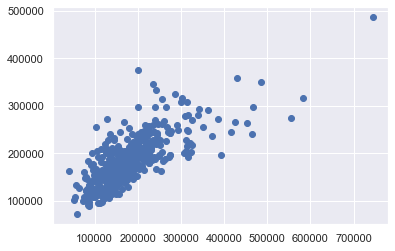

In [15]:
plt.scatter(y_test,predictions)

(array([  3.,  15.,  74., 192., 116.,  18.,  11.,   4.,   2.,   3.]),
 array([-175606.72293217, -129878.79514363,  -84150.8673551 ,
         -38422.93956657,    7304.98822196,   53032.91601049,
          98760.84379902,  144488.77158755,  190216.69937608,
         235944.62716461,  281672.55495314]),
 <BarContainer object of 10 artists>)

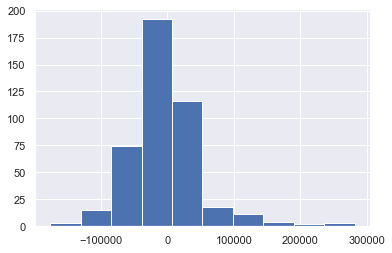

In [16]:
plt.hist(y_test - predictions)

In [17]:
x_kaggle_test = df_test[['GrLivArea']]
predictions_kaggle = model.predict(x_kaggle_test)
df_test['SalePrice'] = predictions_kaggle
df_test[['Id', 'SalePrice']].to_csv('predictions-1.csv', index=False)

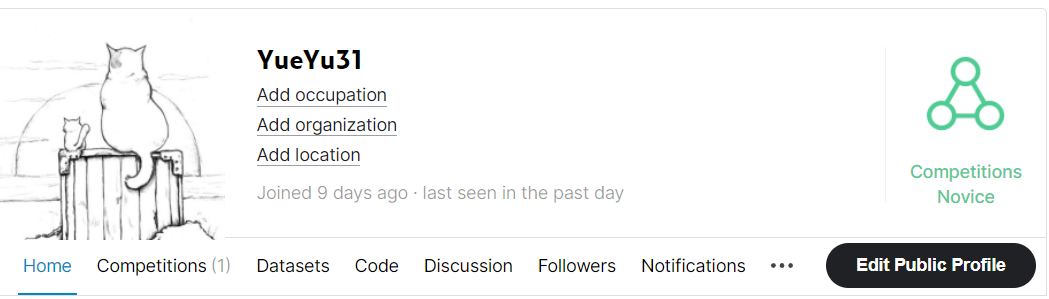

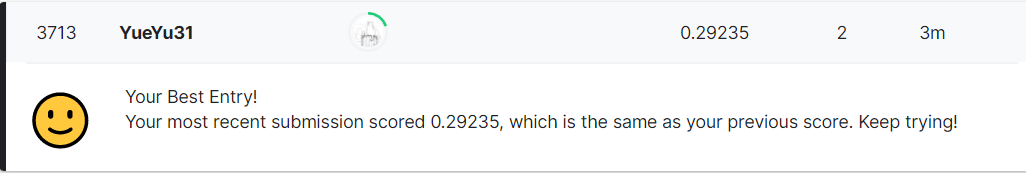

### Indicators
Ture: y_test

Pred: predictions

In [18]:
# Explained Variance Score
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions)

0.5508061307099783

In [19]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

37247.75285318788

In [20]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

2949101771.6124105

In [21]:
# Mean suared logarithmic error
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,predictions)

0.07583063879065127

In [22]:
# Median absolute error
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,predictions)

26624.646313165576

In [23]:
# R^2 score
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.5487760605358964

### Try using piecewise

In [80]:
from scipy import optimize
x_pw = np.array(df_train['GrLivArea'])
y_pw = np.array(df_train['SalePrice'])

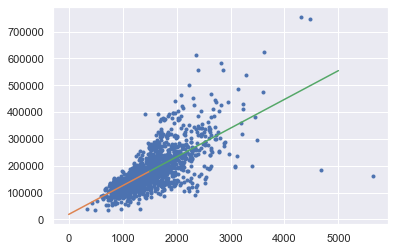

In [92]:
def piecewise_linear(x, x0, x1, b, k1, k2, k3):
    condlist = [x < x0, (x >= x0) & (x < x1), x >= x1]
    funclist = [lambda x: k1*x + b, lambda x: k1*x + b + k2*(x-x0), lambda x: k1*x + b + k2*(x-x0) + k3*(x - x1)]
    return np.piecewise(x, condlist, funclist)

p , e = optimize.curve_fit(piecewise_linear, x_pw, y_pw)

xd = np.linspace(0, 1500)
xd2 = np.linspace(1501,5000)
plt.plot(x_pw, y_pw, ".")
plt.plot(xd, piecewise_linear(xd, *p))
plt.plot(xd2, piecewise_linear(xd2, *p))

I don't seem to have been very successful with piecewise. It's not clear what went wrong.

###  Evaluation polynomial

In [24]:
from sklearn.metrics import r2_score

x_r2 = np.array(df_train['GrLivArea'])
y_r2 = np.array(df_train['SalePrice'])

modelr2 = np.poly1d(np.polyfit(x_r2 , y_r2, 5))
print(r2_score(y_r2, modelr2(x_r2)))

0.5295824692923838


In [25]:
x_kaggle_test_r2 = np.array(df_test[['GrLivArea']])
predictions_kaggle_r2 = modelr2(x_kaggle_test_r2 )
df_test['SalePrice'] = predictions_kaggle_r2 
df_test[['Id', 'SalePrice']].to_csv('predictions-1-2.csv', index=False)

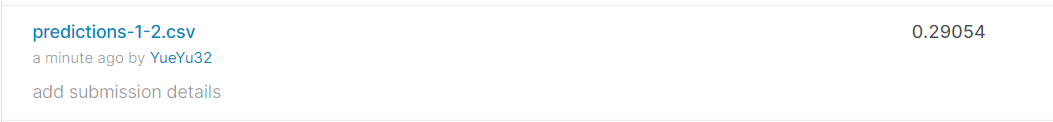

Polynomial was used, and the score was around 0.29, with no significant improvement.

## OverallQual+GrLivArea+GarageArea+TotalBsmtSF - SalePrice Prediction

In [26]:
# Choose four Area to imporve the score
x_train_2 = df_train[['LotArea','GrLivArea','GarageArea','TotalBsmtSF']]
y_train_2 = df_train['SalePrice']

In [27]:
model2 = LinearRegression()
model2.fit(x_train_2,y_train_2)
print(model2.coef_)

[  0.2042161   68.05911842 103.20519411  48.3383165 ]


In [28]:
print(model2.intercept_)

-24295.999456090125


In [29]:
pd.DataFrame(model2.coef_,x_train_2.columns, columns=['Coeff'])

,Coeff
LotArea,0.204216
GrLivArea,68.059118
GarageArea,103.205194
TotalBsmtSF,48.338317


In [30]:
#check and clean nan for each colume in test
df_test_2['LotArea'].isnull().sum()
df_test_2['GrLivArea'].isnull().sum()
df_test_2['GarageArea'].isnull().sum()
df_test_2['GarageArea'] = df_test_2['GarageArea'].fillna(0)
df_test_2['TotalBsmtSF'].isnull().sum()
df_test_2['TotalBsmtSF'] = df_test_2['TotalBsmtSF'].fillna(0)

In [31]:
x_kaggle_test_2 = df_test_2[['LotArea','GrLivArea','GarageArea','TotalBsmtSF']]
predictions_kaggle_2 = model2.predict(x_kaggle_test_2)
df_test_2['SalePrice'] = predictions_kaggle_2
df_test_2[['Id', 'SalePrice']].to_csv('predictions-2.csv', index=False)

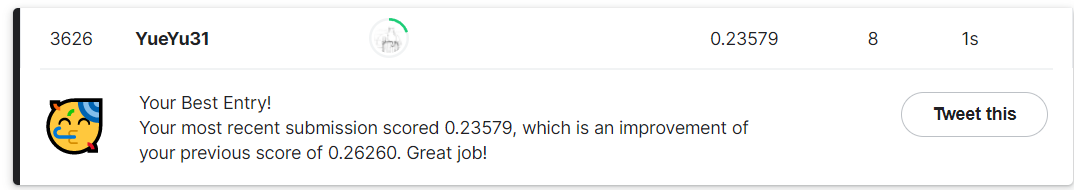

## Creat a New Feature (NeighborhoodMean) by Neighborhood - SalePrice Prediction

In [32]:
df_train_3 = pd.read_csv('train.csv')
df_test_3 = pd.read_csv('test.csv')

mean_price_neighborhood = df_train_3.groupby('Neighborhood')['SalePrice'].mean().reset_index(name="NeighborhoodMean")

# Add Neighobrhood and MSSubClass Average Sales Price feature to train data
new_df_train_3 = pd.merge(df_train_3, mean_price_neighborhood, on=['Neighborhood'])

new_df_train_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NeighborhoodMean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,197965.773333
1,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,197965.773333
2,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,279500,197965.773333
3,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,230000,197965.773333
4,33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,179900,197965.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,189000,142591.360000
1456,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Normal,91000,142591.360000
1457,1400,50,RL,51.0,6171,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,10,2009,WD,Normal,137450,142591.360000
1458,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000,137500.000000


In [33]:
x_train_3 = new_df_train_3[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
y_train_3 = new_df_train_3['SalePrice']

In [34]:
model3 = LinearRegression()
model3.fit(x_train_3,y_train_3)
print(model3.coef_)

[ 0.25725774 55.38230298 53.54687536 32.18812173  0.55368595]


In [35]:
print(model3.intercept_)

-65251.010219579824


In [36]:
pd.DataFrame(model3.coef_,x_train_3.columns, columns=['Coeff'])

,Coeff
LotArea,0.257258
GrLivArea,55.382303
GarageArea,53.546875
TotalBsmtSF,32.188122
NeighborhoodMean,0.553686


In [37]:
# Add Neighobrhood Average Sales Price feature to test data
new_df_test_3 = pd.merge(df_test_3, mean_price_neighborhood, on=['Neighborhood'])

In [38]:
#check and clean nan for each colume in test
new_df_test_3['LotArea'].isnull().sum()
new_df_test_3['GrLivArea'].isnull().sum()
new_df_test_3['GarageArea'].isnull().sum()
new_df_test_3['GarageArea'] = new_df_test_3['GarageArea'].fillna(0)
new_df_test_3['TotalBsmtSF'].isnull().sum()
new_df_test_3['TotalBsmtSF'] = new_df_test_3['TotalBsmtSF'].fillna(0)
new_df_test_3['NeighborhoodMean'].isnull().sum()

0

In [39]:
x_kaggle_test_3 = new_df_test_3[['LotArea','GrLivArea','GarageArea','TotalBsmtSF','NeighborhoodMean']]
predictions_kaggle_3 = model3.predict(x_kaggle_test_3)
new_df_test_3['SalePrice'] = predictions_kaggle_3
new_df_test_3[['Id', 'SalePrice']].to_csv('predictions-3.csv', index=False)

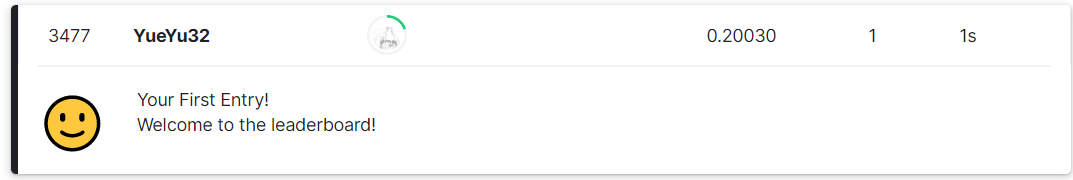

My first account is out of limits, so I used a differnet account to test. The score has imporved from 0.23579 to 0.20030.

I set up three levels of analysis for this research question. In the first case, I used a single feature (GrLivArea), and the score was less than 0.29, proving that it had a good result. In the second case, I selected four existing features (LotArea, GrLivArea, GarageArea, TotalBsmtSF'), optimizing the score to 0.23. Finally, in the third case, I created a new feature (NeighborhoodMean) by categorizing it, adding it to the four previously selected features, and optimizing the score to 0.20.

The result of the analysis is to select numerical features that significantly impact SalePrice, and the more features there are, the more accurate the prediction result will be. However, numerical features are often limited, so adding categorical labels to the conditions is necessary to become new features. In this way, the more critical categorical labels, the more accurate the prediction of results.